In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

**Splitting the dataset into the Training set and Test set**

In [3]:
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]
X.shape, y.shape

((400, 2), (400,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=42)
X_train.shape, X_test.shape

((300, 2), (100, 2))

**Feature Scaling**

In [5]:
# Age, EstimatedSalay have very diverese range of data
# So, I will feature scale them to lie between similar range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[["Age", "EstimatedSalary"]] = scaler.fit_transform(X_train[["Age", "EstimatedSalary"]])
X_test[["Age", "EstimatedSalary"]]  = scaler.transform(X_test[["Age", "EstimatedSalary"]])

**Fitting Random Forest to the Training set**

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [7]:
y_pred = model.predict(X_test)

**Making the Confusion Matrix**

In [8]:
pd.crosstab(y_pred, y_test,  rownames=['Predicted'], colnames=['Actual'], margins=False)

Actual,0,1
Predicted,,
0,56,4
1,7,33


**Visualising the Training set results**

In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


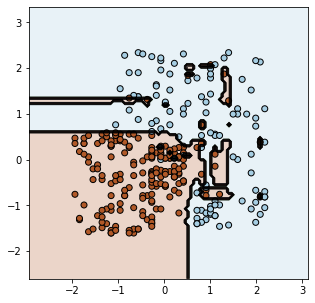

In [11]:
plot_decision_boundary(model, X_train.values, y_train.values)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


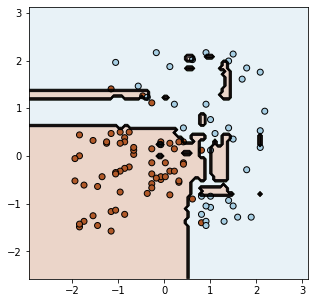

In [12]:
plot_decision_boundary(model, X_test.values, y_test.values)